In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random

from scipy.linalg import svdvals
from sklearn.preprocessing import normalize

from minsv import *
from errorbound import *
from gencorrup import *
from qrk1 import *
from qrk2 import *
from noisyRK import *
from thm25 import *

In [13]:
#Matrix dimensions
m = 20000
n = 100

#Vary the matrix type
#A_t = np.random.randn(m,n)
A_t = np.random.uniform(size=(m,n))
#A_t = np.random.binomial(1,0.5,size=(m,n))

#Create the solution equation
A_n = normalize(A_t)
x_t = np.random.randn(n,1)
b_t = np.dot(A_n,x_t)

x_1 = np.zeros((n,1))
x_1[0] = 1

q = 0.8
b = 0.0001

e_0 = np.linalg.norm(-1*x_t)**2

In [14]:
#Compute sigma values

#sigmin = minSV(A_n,x_1,q,b)
sigmin = minSV2(A_n,q,b)
sigmax = np.linalg.svd(A_n,compute_uv=False).max()

In [15]:
#Generate errors

#errors1 = error_bound_crl_1(A_n,x_t,q,b,0.00003,q,10000)
#errors2 = error_bound_crl_2(A_n,x_t,q,b,0.00001,q,10000)
errors3 = error_bound_crl_3(A_n,x_t,q,b,0.00001,q,10000)

iters = list(range(10000))

In [16]:
#Corruption size + rate manipulation
b = 0.0001
csize = 10000
num = 10000

In [17]:
kacz_experiment = QuantileRK1_ex(A_n,x_t,b_t,q,m,b,csize,num)

In [18]:
kacz_experiment_2 = QuantileRK2_ex(A_n,x_t,b_t,q,m,b,csize,num)

In [19]:
kacz_experiment_3 = QuantileRK2_ex_n(A_n,x_t,b_t,q,m,b,csize,0.00001,num)

c:\Users\pache\anaconda3\lib\site-packages\numpy\ma\core.py:6900: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


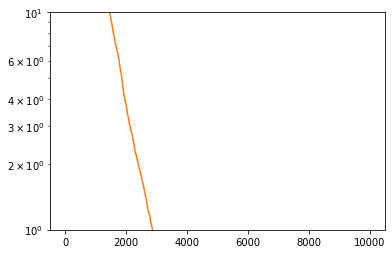

In [20]:
#plt.semilogy(iters,errors1)
#plt.semilogy(iters,errors2)
plt.semilogy(iters,errors3)
plt.semilogy(kacz_experiment_3[1],kacz_experiment_3[2])

In [21]:
#Theorem 2.5
phi2 = 1 - (sigmin/np.linalg.norm(A_n))**2
mean = 0
sd = 0
num = 20000

In [22]:
errors_rk = error_bound_thm_2_5(A_n,mean,sd,num,sigmin,e_0)
kacz_experiment_rk = RK_ex_n(A_n,x_t,b_t,mean,sd,num)

<ipython-input-23-650be181521e>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


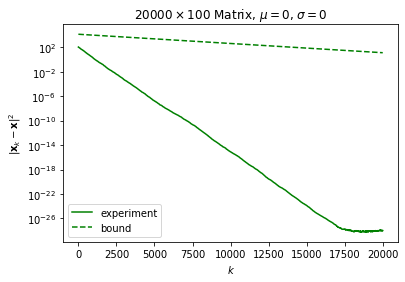

In [23]:
fig = plt.figure()

plt.semilogy(kacz_experiment_rk[1],kacz_experiment_rk[2],'g-')
plt.semilogy(list(range(num)),errors_rk,'g--')

plt.title(r"$20000 \times 100$ Matrix, $\mu = 0$, $\sigma = 0$")
plt.xlabel('$k$')
plt.ylabel('$\|\mathbf{x}_k - \mathbf{x}\|^2$')
plt.legend(['experiment','bound'],loc="lower left")
fig.show()